In [121]:
# V3 le 22/06 Complément des commentaires pour les fonctions
# ======================== Les actions =================================================================
# Drop 2007 et 2008
# Drop Temp9am car c'est la même donnée que TempMin et Temp3pm qui est le même que TempMax
# Drop Katherine et Launceston car trop de nan et pas de ville radar 
# Pour les nan restants on a récupéré les villes "radar" du point de vue météo, et on recopie les données manquantes des villes par rapport aux villes radar (à priori il y fait le même temps)
# Transformer la date en jour mois année
# Ajouter la notion de ville radar pour compléter les données manquantes dans un DF
# Faire un DF pour chaque ville / année / mois et y stocker les moyennes des variables afin de remplir les derniers nan par ces valeurs
# Cloud9am et Cloud3pm liés sur les informations manquantes ==> je propose de dropper Cloud9am
# WindGustDir vent dominant on garde cela et on enlève WindDir9am WindDir3pm
# Idem pour WindGustSpeed
# Drop Cloudxx et WinDirxx
# ======================================================================================================
# 49 villes 

In [1]:
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#===== Importation du fichier d'origine, je l'appelle full_data
full_data = pd.read_csv('weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [24]:
full_data.duplicated().sum()

0

In [3]:
#Je récupère les données radar
villesref=pd.read_csv("VilleRef.csv",sep=";")

In [4]:
villesref

,Ville,Radar
0,Adelaide,Nuriootpa
1,Albany,Perth
2,Albury,SydneyAirport
3,AliceSprings,Darwin
4,BadgerysCreek,SydneyAirport
5,Ballarat,MelbourneAirport
6,Bendigo,MelbourneAirport
7,Brisbane,isole
8,Cairns,isole
9,Canberra,SydneyAirport


In [5]:
dict_villes={}
for idx_ville,ligne in villesref.iterrows():
    dict_villes[ligne['Ville']] = ligne['Radar']

In [6]:
dict_villes

{'Adelaide': 'Nuriootpa',
 'Albany': 'Perth',
 'Albury': 'SydneyAirport',
 'AliceSprings': 'Darwin',
 'BadgerysCreek': 'SydneyAirport',
 'Ballarat': 'MelbourneAirport',
 'Bendigo': 'MelbourneAirport',
 'Brisbane': 'isole',
 'Cairns': 'isole',
 'Canberra': 'SydneyAirport',
 'Cobar': 'SydneyAirport',
 'CoffsHarbour': 'Brisbane',
 'Dartmoor': 'isole',
 'Darwin': 'isole',
 'GoldCoast': 'Brisbane',
 'Hobart': 'isole',
 'Katherine': 'isole',
 'Launceston': 'isole',
 'Melbourne': 'MelbourneAirport',
 'MelbourneAirport': 'isole',
 'Mildura': 'isole',
 'Moree': 'SydneyAirport',
 'MountGambier': 'Dartmoor',
 'MountGinini': 'SydneyAirport',
 'Newcastle': 'SydneyAirport',
 'Nhil': 'MelbourneAirport',
 'NorahHead': 'SydneyAirport',
 'NorfolkIsland': 'Hobart',
 'Nuriootpa': 'isole',
 'PearceRAAF': 'Perth',
 'Penrith': 'SydneyAirport',
 'Perth': 'isole',
 'PerthAirport': 'isole',
 'Portland': 'MelbourneAirport',
 'Richmond': 'SydneyAirport',
 'Sale': 'MelbourneAirport',
 'SalmonGums': 'Perth',
 'Sydn

In [125]:
def get_radar(df_1, villesref):
    
    ''' this function read two dataframe:
        1)  df_1 contain a column called Location
        2)  df_2 contain a column called Ville
        if the location are equals to the villes, 
        this function extract from the dictionary
        called dict_villes the radar element and put it 
        into a list radar.
        Eventually, the list is added as column at 
        df_1
        IMPORTANT before to use this function you shoul to
        import the villesref DataFrame as follow:
        villesref=pd.read_csv("VilleRef2.csv",sep=";")        
    '''

    dict_villes={}
    for idx_ville,ligne in villesref.iterrows():
        dict_villes[ligne['Ville']] = ligne['Radar']
    
    radar = []
    for city_1 in df_1.Location:
        for city_2 in villesref.Ville:
            if city_1 == city_2:
                radar.append(dict_villes.get(city_2))
                
    df_1['Radar'] = radar

#Exemple appel get_radar(df,villesref)


In [7]:
# Je transforme la date en jour mois année car j'en ai besoin mais ce  traitement sera fait par Bernadino car il a besoin aussi de ces informations pour faire les graphes
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day

In [61]:
full_data['week']= full_data['Date'].dt.weekofyear

C:\Users\rblv6364\AppData\Local\Temp\1\ipykernel_18336\2649744558.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  full_data['week']= full_data['Date'].dt.weekofyear


In [8]:
#Je droppe les villes où il y a trop peu de données
full_data.drop(full_data[full_data['Location'] == 'Katherine'].index, inplace = True, axis=0)
full_data.drop(full_data[full_data['Location'] == 'Launceston'].index, inplace = True, axis=0)

In [9]:
#2007 et 2008 sont quasi vides on supprime
full_data.drop(full_data[full_data['year'] == 2007].index, inplace = True, axis=0)
full_data.drop(full_data[full_data['year'] == 2008].index, inplace = True, axis=0)

In [10]:
full_data = full_data.dropna(subset=['RainToday'],axis=0)
full_data = full_data.dropna(subset=['RainTomorrow'],axis=0)

In [11]:
full_data.shape

(133963, 27)

In [84]:
TAILLE=full_data.shape[0]

In [12]:
full_data=full_data.drop('Temp9am',axis=1)
full_data=full_data.drop('Temp3pm',axis=1)
full_data=full_data.drop('WindDir9am',axis=1)
full_data=full_data.drop('WindDir3pm',axis=1)
full_data=full_data.drop('WindSpeed9am',axis=1)
full_data=full_data.drop('WindSpeed3pm',axis=1)
full_data=full_data.drop('Cloud9am',axis=1)
full_data=full_data.drop('Cloud3pm',axis=1)

In [1002]:
# ======================================================================= Les fonctions utiles

In [120]:
#Fonction qui cherche le mode d'une variable par semaine car données insuffisantes pour la ville et pas de données non plus dans la ville radar ou pas de ville radar associée
#V2 (ajout week)
def FindValByModeWeek(ville,variable,year,month,week):
    cond=((full_data['Location']==ville) & (full_data['year']==year) & (full_data['month']==month)) & (full_data['week']==week)
    x=full_data[cond][variable].index
    if (x.empty):
        return np.nan
    else:
        y=full_data[cond][variable].mode()
        if (y.empty):
            return np.nan
        else:
            return full_data[cond][variable].mode()[0]

In [119]:
#Fonction qui cherche le mode d'une variable par mois car données insuffisantes pour la ville et pas de données non plus dans la ville radar ou pas de ville radar associée
def FindValByModeMois(ville,variable,year,month):
    cond=((full_data['Location']==ville) & (full_data['year']==year) & (full_data['month']==month))
    x=full_data[cond][variable].index
    if (x.empty):
        return np.nan
    else:
        y=full_data[cond][variable].mode()
        if (y.empty):
            return np.nan
        else:
            return full_data[cond][variable].mode()[0]

In [118]:
# Fonction utilisée à la fin pour mettre à jour les derniers nan des variables par le tableau des moyennes par semaine
#En paramètre le tableau envoyé contient les nan avec les index associés
#V2 (optim tps traitement)
def MajVariableParTblMoy(tblval,variable):
    tableau=tblval.to_dict('index')
    for ligne in tableau:
        cond=((tbl_moy['Location']==tableau[ligne]['Location']) & (tbl_moy['year']==tableau[ligne]['year']) & (tbl_moy['month']==tableau[ligne]['month']) & (tbl_moy['week']==tableau[ligne]['week']) )
        val_moyenne=tbl_moy[cond][variable].to_numpy()
        full_data.loc[ligne,variable]=val_moyenne[0]

In [117]:
# Fonction qui met à jour le tableau des moyennes mois/semaine (tbl_moy), ce tableau sert à la fin à combler les derniers nan des villes
#En paramètre le tableau envoyé contient les nan avec les index associés
#V2 (optim tps traitement + week)
def Maj_TblMoy(tab_moy,variable):
    tableau=tab_moy.to_dict('index')
    for ligne in tableau:
        ville_ref = dict_villes[tableau[ligne]['Location']]
        if ville_ref =='isole':
            cond=(full_data['Location']==tableau[ligne]['Location'])
        else:
            cond=(full_data['Location']==ville_ref)
        y=full_data[cond & (full_data['year']==tableau[ligne]['year']) & (full_data['week']==tableau[ligne]['week'])][variable].mode()
        if (y.empty):
            y=full_data[cond & (full_data['year']==tableau[ligne]['year'])][variable].mode()
            if (y.empty):
                Mode_An=full_data[cond][variable].mode()[0]
            else:
                Mode_An=y[0]
        else:
            Mode_An=y[0]
        tbl_moy.loc[ligne,variable]=Mode_An

In [116]:
# Récupère dans un DF toutes les lignes qui ont des valeurs Nan pour la variable passée en paramètre avec leurs index
#V2
def VisionNull(variable):
    df2 = full_data[full_data[variable].isnull()][['Location','year','month','day','week']]
    return df2.sort_values(by=['Location','year','month','day','week'])

In [113]:
#Format tableau (dict de dict) qui est plus performant que iterrows
#{96547: {'Location': 'Adelaide', 'year': 2009, 'month': 2, 'day': 13}, 96572: {'Location': 'Adelaide', 'year': 2009, 'month': 3, 'day': 10}

In [115]:
#Pour les valeurs nulles importantes on utilise cette fonction en premier, cette fonction appelle la fonction qui met à jour les données par jour/mois/année en fonction de la ville de réference ou par le mode si données incomplètes
#En paramètre le tableau envoyé contient les nan avec les index associés
#V3 (optim tps traitement+week)
def TraitePaquets(tab_var,variable):
    i=0
    tableau=tab_var.to_dict('index')
    for ligne in tableau:
        V1=tableau[ligne]['Location']
        V2=dict_villes[V1]
        if V2=='isole':
            retour=FindValByModeWeek(V1,variable,tableau[ligne]['year'],tableau[ligne]['month'],tableau[ligne]['week'])
            if pd.isnull(retour):
                retour=FindValByModeMois(V1,variable,tableau[ligne]['year'],tableau[ligne]['month'])
        else:
            retour=FindValVilleRef(V2,variable,tableau[ligne]['year'],tableau[ligne]['month'],tableau[ligne]['day'])
            if pd.isnull(retour): 
                retour=FindValByModeWeek(V2,variable,tableau[ligne]['year'],tableau[ligne]['month'],tableau[ligne]['week'])
                if pd.isnull(retour):
                    retour=FindValByModeMois(V2,variable,tableau[ligne]['year'],tableau[ligne]['month'])
         
        full_data.loc[ligne,variable]=retour
        i+=1
    print(str(i)+ " lignes traitées")

In [28]:
# Fonction qui cherche la valeur de la variable passée en paramètre pour l'année/le mois/le jour et la ville passés en paramètres
#V2
def FindValVilleRef(ville,variable,year,month,day):
    cond=((full_data['Location']==ville) & (full_data['year']==year) & (full_data['month']==month) & (full_data['day']==day))
    x=full_data[cond][variable].index
    if x.empty:
        return np.nan
    else:
    #index compris entre (x>=0) & (x <= TAILLE):
        return full_data[cond][variable].to_numpy()[0]

In [114]:
#Fonction specifique à WindGustDir pour lequel il n'y a pas de données dans le tableau des moyennes (car valeur catégorielles) pour les derniers nan on met le mode()
#V2 (optim tps traitement + week)
def TraiteWindGustDirFinal(tab_var,variable):
    i=0
    tableau=tab_var.to_dict('index')
    for ligne in tableau:
        V1=tableau[ligne]['Location']
        V2=dict_villes[V1]
        full_data.loc[ligne,variable]=FindValByModeWeek(V1,variable,tableau[ligne]['year'],tableau[ligne]['month'],tableau[ligne]['week'])
        i+=1
    print(str(i)+ " lignes traitées")
    return "Fin", i, 'lignes traitées'

In [35]:
from time import time
t0 = time()
tbl_val=VisionNull('Sunshine')
TraitePaquets(tbl_val,'Sunshine')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 632.227 secondes


In [37]:
t0 = time()
tbl_val=VisionNull('Evaporation')
TraitePaquets(tbl_val,'Evaporation')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

56442 lignes traitées
Réalisé en 725.154 secondes


In [39]:
t0 = time()
tbl_val=VisionNull('Pressure9am')
TraitePaquets(tbl_val,'Pressure9am')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

12506 lignes traitées
Réalisé en 154.94 secondes


In [45]:
t0 = time()
tbl_val=VisionNull('Pressure3pm')
TraitePaquets(tbl_val,'Pressure3pm')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

12349 lignes traitées
Réalisé en 148.186 secondes


In [46]:
t0 = time()
tbl_val=VisionNull('MinTemp')
TraitePaquets(tbl_val,'MinTemp')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

431 lignes traitées
Réalisé en 5.483 secondes


In [47]:
t0 = time()
tbl_val=VisionNull('MaxTemp')
TraitePaquets(tbl_val,'MaxTemp')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

279 lignes traitées
Réalisé en 3.476 secondes


In [48]:
t0 = time()
tbl_val=VisionNull('Rainfall')
TraitePaquets(tbl_val,'Rainfall')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

0 lignes traitées
Réalisé en 0.008 secondes


In [49]:
t0 = time()
tbl_val=VisionNull('Humidity9am')
TraitePaquets(tbl_val,'Humidity9am')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

1428 lignes traitées
Réalisé en 18.904 secondes


In [50]:
t0 = time()
tbl_val=VisionNull('WindGustSpeed')
TraitePaquets(tbl_val,'WindGustSpeed')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

8604 lignes traitées
Réalisé en 110.78 secondes


In [51]:
t0 = time()
tbl_val=VisionNull('Humidity3pm')
TraitePaquets(tbl_val,'Humidity3pm')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

2661 lignes traitées
Réalisé en 34.946 secondes


In [52]:
t0 = time()
tbl_val=VisionNull('WindGustDir')
TraitePaquets(tbl_val,'WindGustDir')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

8660 lignes traitées
Réalisé en 108.4 secondes


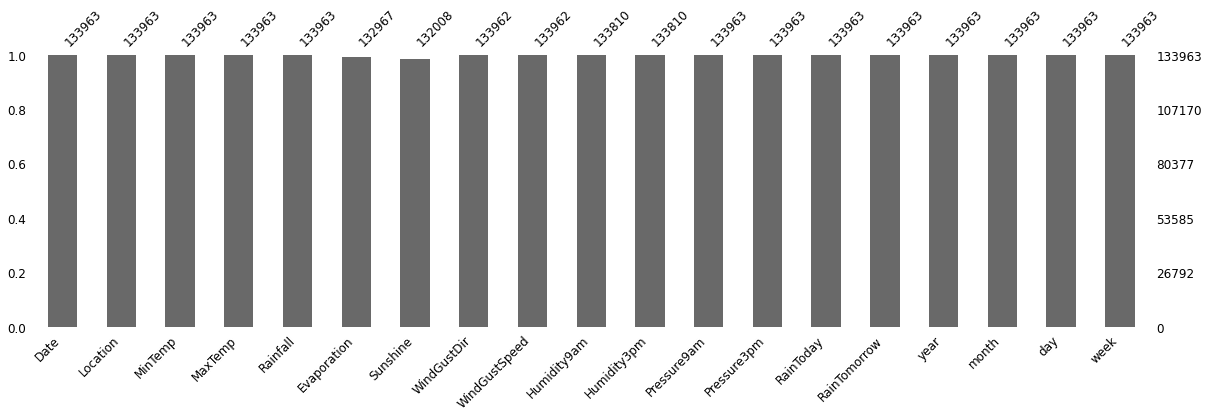

In [53]:
msno.bar(full_data, figsize=(20,5), fontsize=12);

In [64]:
# Je construis le tableau des moyennes mensuelles pour chaque ville / année / mois afin de combler les derniers nan de full_data
tbl_moy=full_data.groupby(['Location','year','month','week'],as_index=False).mean()
tbl_moy.shape

(23439, 15)

In [65]:
tbl_moy

,Location,year,month,week,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,day
0,Adelaide,2009,1,1,14.925000,27.350000,0.000000,9.550000,12.050000,37.000000,37.000000,21.750000,1015.900000,1014.450000,2.5
1,Adelaide,2009,1,2,14.514286,27.642857,0.028571,10.228571,11.857143,38.857143,43.857143,28.142857,1014.857143,1012.842857,8.0
2,Adelaide,2009,1,3,16.414286,31.671429,0.000000,11.542857,12.242857,37.714286,40.285714,25.428571,1017.514286,1015.000000,15.0
3,Adelaide,2009,1,4,17.157143,30.628571,0.142857,11.457143,12.114286,41.285714,41.428571,27.285714,1010.328571,1009.271429,22.0
4,Adelaide,2009,1,5,26.600000,42.183333,0.000000,16.300000,12.250000,42.666667,23.166667,10.333333,1012.050000,1009.383333,28.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23434,Woomera,2017,5,22,7.900000,17.533333,0.000000,2.866667,NaN,30.333333,75.666667,50.666667,1029.333333,1027.600000,30.0
23435,Woomera,2017,6,22,2.625000,17.975000,0.000000,2.600000,NaN,21.500000,54.250000,24.500000,1033.500000,1030.600000,2.5
23436,Woomera,2017,6,23,4.857143,17.757143,0.000000,2.950000,NaN,31.142857,74.142857,42.571429,1031.942857,1029.528571,8.0
23437,Woomera,2017,6,24,7.214286,18.914286,0.028571,3.300000,NaN,27.571429,70.428571,39.714286,1028.800000,1026.128571,15.0


In [66]:
tbl_moy.isnull().sum()

Location           0
year               0
month              0
week               0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation      174
Sunshine         340
WindGustSpeed      0
Humidity9am       26
Humidity3pm       26
Pressure9am        0
Pressure3pm        0
day                0
dtype: int64

In [70]:
t0 = time()
tab_moy=tbl_moy[tbl_moy['Evaporation'].isnull()][['Location','year','week']]
tab_moy=tab_moy.sort_values(by=['Location','year','week'])
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.007 secondes


In [72]:
t0 = time()
Maj_TblMoy(tab_moy,'Evaporation')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 1.293 secondes


In [75]:
t0 = time()
tab_moy=tbl_moy[tbl_moy['Sunshine'].isnull()][['Location','year','week']]
tab_moy=tab_moy.sort_values(by=['Location','year','week'])
Maj_TblMoy(tab_moy,'Sunshine')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 4.755 secondes


In [77]:
t0 = time()
tab_moy=tbl_moy[tbl_moy['Humidity9am'].isnull()][['Location','year','week']]
tab_moy=tab_moy.sort_values(by=['Location','year','week'])
Maj_TblMoy(tab_moy,'Humidity9am')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.376 secondes


In [78]:
t0 = time()
tab_moy=tbl_moy[tbl_moy['Humidity3pm'].isnull()][['Location','year','week']]
tab_moy=tab_moy.sort_values(by=['Location','year','week'])
Maj_TblMoy(tab_moy,'Humidity3pm')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.369 secondes


In [79]:
tbl_moy.isnull().sum()

Location         0
year             0
month            0
week             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
day              0
dtype: int64

In [80]:
full_data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation       996
Sunshine         1955
WindGustDir         1
WindGustSpeed       1
Humidity9am       153
Humidity3pm       153
Pressure9am         0
Pressure3pm         0
RainToday           0
RainTomorrow        0
year                0
month               0
day                 0
week                0
dtype: int64

In [86]:
#Mise à jour des derniers nan par tblmoy
t0 = time()
tbl_val=VisionNull('Evaporation')
MajVariableParTblMoy(tbl_val,'Evaporation')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 3.378 secondes


In [87]:
#Mise à jour des derniers nan par tblmoy
t0 = time()
tbl_val=VisionNull('Sunshine')
MajVariableParTblMoy(tbl_val,'Sunshine')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 6.36 secondes


In [88]:
t0 = time()
tbl_val=VisionNull('Humidity9am')
MajVariableParTblMoy(tbl_val,'Humidity9am')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.55 secondes


In [89]:
t0 = time()
tbl_val=VisionNull('Humidity3pm')
MajVariableParTblMoy(tbl_val,'Humidity3pm')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.539 secondes


In [90]:
full_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      1
WindGustSpeed    1
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
week             0
dtype: int64

In [93]:
#Traitement derniers nan
t0 = time()
tbl_val=VisionNull('WindGustDir')
TraiteWindGustDirFinal(tbl_val,'WindGustDir')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

1 lignes traitées
Réalisé en 0.025 secondes


In [94]:
t0 = time()
tbl_val=VisionNull('WindGustSpeed')
TraiteWindGustDirFinal(tbl_val,'WindGustSpeed')
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

1 lignes traitées
Réalisé en 0.019 secondes


In [95]:
full_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
week             0
dtype: int64

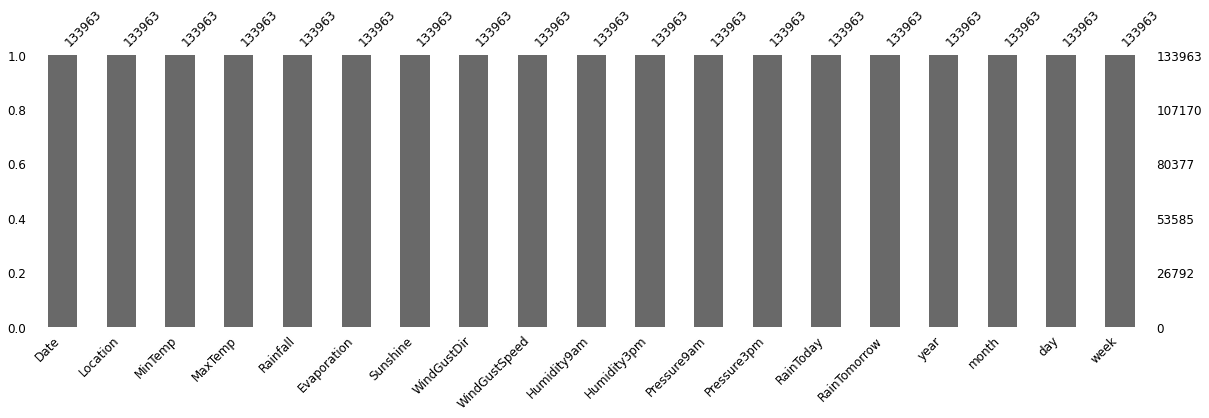

In [96]:
# Graphique Missingno pour évaluer les données manquantes après traitement
msno.bar(full_data, figsize=(20,5), fontsize=12);

In [99]:
old_data = pd.read_csv('weatherAUS.csv')

In [101]:
#Describe du csv d'origine avec tous les nan
old_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [102]:
#Describe du csv final sans nan
full_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,year,month,day,week
count,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000
mean,12.188144,23.202171,2.348719,5.355360,7.532982,40.139262,68.712570,51.419959,1017.816010,1015.432703,2012.815173,6.357128,15.712473,25.943529
std,6.345147,7.054183,8.503735,3.784837,3.818596,13.622165,19.155569,20.841539,7.036004,6.960206,2.488179,3.415930,8.798852,14.933248
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,980.500000,977.100000,2009.000000,1.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,2.600000,4.700000,31.000000,57.000000,36.000000,1013.100000,1010.700000,2011.000000,3.000000,8.000000,13.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,70.000000,52.000000,1017.800000,1015.400000,2013.000000,6.000000,16.000000,25.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,83.000000,66.000000,1022.500000,1020.100000,2015.000000,9.000000,23.000000,39.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,100.000000,100.000000,1041.000000,1038.900000,2017.000000,12.000000,31.000000,53.000000


In [103]:
#Export du fichier
full_data.to_csv('WeatherAUSFinal.csv',sep=';',index=False)

In [ ]:
#====== Ajouter région et radar dans le dataset =======================================

In [36]:
full_data=pd.read_csv("WeatherAUSFinal.csv",sep=";")

In [104]:
villesregion=pd.read_csv("VillesRegion.csv",sep=";")
villesregion

,Ville,Region
0,Adelaide,South Australia
1,MountGambier,South Australia
2,Nuriootpa,South Australia
3,Richmond,Tasmania
4,woomera,South Australia
5,Brisbane,Queensland
6,Cairns,Queensland
7,CoffsHarbour,New South Wales
8,GoldCoast,Queensland
9,Townsville,Queensland


In [105]:
villesradarregion=pd.merge(villesref, villesregion, left_on='Ville', right_on='Ville', how='inner') 

In [111]:
villesradarregion

,Ville,Radar,Region
0,Adelaide,Nuriootpa,South Australia
1,Albany,Perth,Western Australia
2,Albury,SydneyAirport,New South Wales
3,BadgerysCreek,SydneyAirport,New South Wales
4,Ballarat,MelbourneAirport,Victoria
5,Bendigo,MelbourneAirport,Victoria
6,Brisbane,isole,Queensland
7,Cairns,isole,Queensland
8,Canberra,SydneyAirport,New South Wales
9,Cobar,SydneyAirport,New South Wales


In [106]:
dict_regions={}
for idx_ville,ligne in villesregion.iterrows():
    dict_villes[ligne['Ville']] = ligne['Region']

In [107]:
new_data=pd.merge(full_data, villesradarregion, left_on='Location', right_on='Ville', how='inner') 
new_data=new_data.drop('Ville',axis=1)

In [108]:
new_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,...,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,Radar,Region
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,WNW,56.0,46.0,...,1004.5,1003.2,No,No,2009,1,1,1,SydneyAirport,New South Wales
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,W,41.0,44.0,...,1014.4,1013.1,No,No,2009,1,2,1,SydneyAirport,New South Wales
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,SSE,26.0,43.0,...,1018.7,1014.8,No,No,2009,1,3,1,SydneyAirport,New South Wales
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,WNW,37.0,41.0,...,1015.1,1010.3,No,No,2009,1,4,1,SydneyAirport,New South Wales
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,WNW,41.0,41.0,...,1012.6,1009.2,No,No,2009,1,5,2,SydneyAirport,New South Wales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124843,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,63.0,...,1013.9,1010.5,No,No,2017,6,20,25,isole,Northern Territory
124844,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,56.0,...,1014.6,1011.2,No,No,2017,6,21,25,isole,Northern Territory
124845,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,46.0,...,1015.3,1011.8,No,No,2017,6,22,25,isole,Northern Territory
124846,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,62.0,...,1014.9,1010.7,No,No,2017,6,23,25,isole,Northern Territory


In [109]:
new_data.to_csv('WeatherAUSRadarRegion.csv',sep=';',index=False)

In [8]:
#Export par Region

In [110]:
data_region_NSW = new_data[new_data['Region']=='New South Wales']
data_region_VIC = new_data[new_data['Region']=='Victoria']
data_region_WEA = new_data[new_data['Region']=='Western Australia']
data_region_SOA = new_data[new_data['Region']=='South Australia']
data_region_TAS=new_data[new_data['Region']=='Tasmania']
data_region_NIS = new_data[new_data['Location']=='NorfolkIsland']

In [112]:
data_region_NSW.to_csv('WeatherAUSRegionNSW.csv',sep=';',index=False)
data_region_VIC.to_csv('WeatherAUSRegionVIC.csv',sep=';',index=False)
data_region_WEA.to_csv('WeatherAUSRegionWEA.csv',sep=';',index=False)
data_region_SOA.to_csv('WeatherAUSRegionSOA.csv',sep=';',index=False)
data_region_TAS.to_csv('WeatherAUSRegionTAS.csv',sep=';',index=False)
data_region_NIS.to_csv('WeatherAUSRegionNIS.csv',sep=';',index=False)